In Progress...

# Academic Integrity Declaration

Academic Integrity and Learning Statement

By submitting my work, I confirm that:

1. The code, analysis, and documentation in this notebook are my own work and reflect my own understanding.
2. I am prepared to explain all code and analysis included in this submission.

If I used assistance (e.g., AI tools, tutors, or other resources), I have:

- Clearly documented where and how external tools or resources were used in my solution.
- Included a copy of the interaction (e.g., AI conversation or tutoring notes) in an appendix.

I acknowledge that:

- I may be asked to explain any part of my code or analysis during evaluation.
- Misrepresenting assisted work as my own constitutes academic dishonesty and undermines my learning.


# A. Dataset overview

In this task, we aim to understand the general structure, size and completeness of the dataset.

This includes checking the number of rows and columns, previewing the first few entries, and reviewing the index, column names, data types, and any missing values.

>This ensures that the dataset is clean, consistent and ready for further analysis and visualizations.

To explore the dataset, we will:

## 1. Load the dataset into a Pandas DataFrame

We first import the dataset, `p1_communes.csv`, using the pandas library and store it in a DataFrame, `df`.

>This allows for efficient data manipulation and analysis using built-in pandas functions.

In [1]:
import pandas as pd

df = pd.read_csv("p1_communes.csv")

## 2. Check the number of rows and columns

The `.shape` attribute was used to check the dimensions of the data structure.

>This provides a quick summary of how many observations (rows) and features (columns) they are.

In [2]:
print("(rows, columns):", df.shape)

(rows, columns): (2202, 17)


## 3. Display the first few entries
The `.head()` function was applied to preview the first 5 entries.

>This helps verify that the dataset was loaded correctly and provides an initial understanding of its structure and contents.

In [3]:
print("First 5 rows:")
display(df.head())

First 5 rows:


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583
3,ZH,Hausen am Albis,de,3701,272.132353,21.804918,60.686301,17.508781,1546,13.60,12.692590,55.906090,28.833456,2.567865,2682900,1233100,653
4,ZH,Hedingen,de,3734,571.822358,21.772898,61.756829,16.470273,1540,6.53,19.817073,46.341463,33.231707,0.609756,2676400,1239000,543


## 4. Obtain index labels and column names as a list 

- I got the index labels using only `.index` as I can see from the previous cell thatit's pandas automatic numerical indexing. 

- `.columns.tolist()` converts the pandas Index object containing the columns names (returned by `.columns`) into a list

>This reveals how the full data is organized and which variables are available for analysis.

In [4]:
# Index labels
df.index

RangeIndex(start=0, stop=2202, step=1)

In [5]:
# Column names as list
print("Column names:", df.columns.tolist())

Column names: ['Canton', 'Commune', 'Language', 'Residents', 'Population density per km²', '0-19 years', '20-64 years', '65 years or over', 'Private households', 'Surface area in km²', 'Settlement area', 'Agricultural area', 'Wooded area', 'Unproductive area', 'East coordinate', 'North coordinate', 'Elevation']


## 5. Examine the data types of each column

Based on the data type of each column, we can already know the appropriate graphs to use for any visual inquiry. For this, we ensure that each column is stored in the correct format.

`df.dtypes` returns a Series where each column name is paired with its data type.

In [6]:
df.dtypes

Canton                         object
Commune                        object
Language                       object
Residents                       int64
Population density per km²    float64
0-19 years                    float64
20-64 years                   float64
65 years or over              float64
Private households              int64
Surface area in km²           float64
Settlement area               float64
Agricultural area             float64
Wooded area                   float64
Unproductive area             float64
East coordinate                 int64
North coordinate                int64
Elevation                       int64
dtype: object

The columns are stored properly and the data types are consistent with what they represent.

In [7]:
# Separate columns by dtype and convert to a list
quant_cont = df.columns[df.dtypes == 'float64'].tolist()
quant_disc = df.columns[df.dtypes == 'int64'].tolist()
categ_nom = df.columns[df.dtypes == 'object'].tolist()

# Convert each Index to a single-column DataFrame
quant_cont_df = pd.Series(quant_cont, name="Quantitative (Continuous)").to_frame()
quant_disc_df = pd.Series(quant_disc, name="Quantitative (Discrete)").to_frame()
categ_nom_df = pd.Series(categ_nom, name="Categorical (Nominal)").to_frame()

# Concatenate DataFrames side by side
graph_summary = pd.concat([quant_cont_df, quant_disc_df, categ_nom_df], axis=1)

# Replace NaN with empty string
graph_summary.fillna("", inplace=True)

# Display the summary
display(graph_summary)

,Quantitative (Continuous),Quantitative (Discrete),Categorical (Nominal)
0,Population density per km²,Residents,Canton
1,0-19 years,Private households,Commune
2,20-64 years,East coordinate,Language
3,65 years or over,North coordinate,
4,Surface area in km²,Elevation,
5,Settlement area,,
6,Agricultural area,,
7,Wooded area,,
8,Unproductive area,,


To have this nice display, we:

- Filtered columns by dtype using a Boolean Series and put them in a list

`df.dtypes == 'float64'` produces a Boolean Series with `True` for columns of type float64 and `False` otherwise.

`df.columns[...]` uses this Boolean Series to select column names where the condition is `True`.

`.tolist()` converts this index into a list so we can further apply all methods for lists.

We repeat this for int64 and object columns.

- Converted the lists to single-column DataFrames

`pd.Series(quant_cont, name="Quantitative (Continuous)").to_frame()` converts the list of column names to a Series with a given name, then to a one-column DataFrame for display.
   - `quant_cont`: continuous quantitative variables (float64)
   - `quant_disc`: discrete quantitative variables (int64)
   - `categ_nom`: categorical nominal variables (object)

- Combined the DataFrames side by side

`pd.concat([...], axis=1)` merges the three DataFrames into one table, aligning rows by index.

Empty cells (because the lists may have different lengths) are filled with `NaN`.

- Cleaned up for display

`graph_summary.fillna("", inplace=True)` replaces all `NaN` values with empty strings for a neat presentation.  

`display(graph_summary)` shows all column names clearly in one table.

This makes it easier to plan graphical summaries and further analysis, distinguishing between continuous, discrete, and categorical variables.

## 6. Identify and show rows with missing values

To detect missing values, we used `df.isnull().any(axis=1)` to identify the rows containing them. These rows were extracted into a new variable `missing_rows`, counted using `len()`, and displayed for review. 

In [8]:
# Identify rows with missing values
missing_rows = df[df.isnull().any(axis=1)]
print(f"Number of rows with missing values: {len(missing_rows)}")

# show missing value
display(missing_rows)

Number of rows with missing values: 11


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
155,ZH,Stammheim,NaN,2747,114.649416,21.405169,58.281762,20.313069,1125,23.96,9.056761,55.801336,34.557596,0.584307,2702400,1276500,455
156,ZH,Wädenswil,NaN,24341,682.968575,19.740356,59.944127,20.315517,10371,35.64,19.336706,63.265880,15.064643,2.332771,2693400,1231600,641
157,ZH,Elgg,NaN,4903,201.025010,20.762798,60.473180,18.764022,2121,24.39,9.545268,46.907005,43.138058,0.409668,2707700,1260900,598
158,ZH,Horgen,NaN,22665,735.160558,20.657401,60.480918,18.861681,9685,30.83,18.456049,38.858255,39.506974,3.178722,2687800,1234900,624
440,NaN,Thurnen,NaN,1922,323.025210,20.759625,58.324662,20.915713,814,5.95,13.949580,79.159664,6.050420,0.840336,2605300,1184700,558
704,NaN,Villaz,NaN,2287,148.217758,24.398776,61.346742,14.254482,897,15.44,8.808290,70.336788,20.401554,0.453368,2563200,1174400,727
757,NaN,Prez,NaN,2236,139.401496,25.000000,61.672630,13.327370,839,16.04,6.924517,68.808484,23.268871,0.998129,2567700,1181700,651
1133,GR,Bergün Filisur,NaN,905,4.759651,16.574586,59.668508,23.756906,397,190.14,0.977815,19.824414,27.541794,51.655977,2776700,1166700,2273
1165,GR,Rheinwald,NaN,577,4.217220,16.984402,54.072790,28.942808,266,136.82,1.124334,34.328685,14.448419,50.098562,2744500,1157500,2192
1626,TI,Riviera,NaN,4220,48.780488,20.071090,61.445498,18.483412,1774,86.58,4.008317,7.034770,65.553887,23.403026,2718700,1128900,1458


##  7.  Handling missing data  

This helps gage data gaps that may require action.

In [9]:
df.isnull().mean(axis=0)

Canton                        0.001362
Commune                       0.000000
Language                      0.004995
Residents                     0.000000
Population density per km²    0.000000
0-19 years                    0.000000
20-64 years                   0.000000
65 years or over              0.000000
Private households            0.000000
Surface area in km²           0.000000
Settlement area               0.000000
Agricultural area             0.000000
Wooded area                   0.000000
Unproductive area             0.000000
East coordinate               0.000000
North coordinate              0.000000
Elevation                     0.000000
dtype: float64

`Canton`and `Language` are the 2 columns with missing values in their rows. Although dropping these rows wouldnt have significantly impacted our analysis as is suggesting the `.mean()`method above, both columns contain categorical nominal values and can be quickly filled by referecing reliable sources like Google or ChatGPT.  

But first, we inspect the existing entries to ensure the replacements we make later are consistent with the existing spelling used in the dataset.

In [10]:
# Check existing unique values
print("Unique values in 'Canton':")
print(df['Canton'].unique())

print("\nUnique values in 'Language':")
print(df['Language'].unique())

Unique values in 'Canton':
['ZH' 'BE' nan 'LU' 'UR' 'SZ' 'OW' 'NW' 'GL' 'ZG' 'FR' 'SO' 'BS' 'BL' 'SH'
 'AR' 'AI' 'SG' 'GR' 'AG' 'TG' 'TI' 'VD' 'VS' 'NE' 'GE' 'JU']

Unique values in 'Language':
['de' nan 'fr' 'rm' 'it']


Then we used the available commune names in the 11 rows to look up and fill in the correct cantons and languages using `.fillna()`. 

`df.isna().sum().sum()` returns the total number of NaN values in the entire df.

`inplace=True`parameter applies the changes to the original DataFrame. 

In [11]:
# Fill missing Canton values
df['Canton'].fillna({
    440: 'BE',   # Thurnen: Canton of Bern
    704: 'FR',   # Villaz: Canton of Fribourg
    757: 'FR',   # Prez: Canton of Fribourg
}, inplace=True)

# Fill missing Language values
df['Language'].fillna({
    155: 'de',
    156: 'de',
    157: 'de',
    158: 'de',
    440: 'de',
    704: 'fr',
    757: 'fr',
    1133: 'de',
    1165: 'de',
    1626: 'it',
    2079: 'fr',
}, inplace=True)

df.isna().sum().sum()

0

In [12]:
# Final verification 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2202 entries, 0 to 2201
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canton                      2202 non-null   object 
 1   Commune                     2202 non-null   object 
 2   Language                    2202 non-null   object 
 3   Residents                   2202 non-null   int64  
 4   Population density per km²  2202 non-null   float64
 5   0-19 years                  2202 non-null   float64
 6   20-64 years                 2202 non-null   float64
 7   65 years or over            2202 non-null   float64
 8   Private households          2202 non-null   int64  
 9   Surface area in km²         2202 non-null   float64
 10  Settlement area             2202 non-null   float64
 11  Agricultural area           2202 non-null   float64
 12  Wooded area                 2202 non-null   float64
 13  Unproductive area           2202 

>The dataset is now clean, consistent, and ready for further analysis.

# B. Exploration: numerical summaries, indexing and grouping

In this section, we perform exploratory data analysis to understand the numerical characteristics and patterns in the dataset.

The tasks include computing summary statistics, ranking communes by population, grouping data by canton, and deriving insights such as population density and elevation range.

## 1. Numerical summaries

We start by summarizing the numerical variables using only the **mean, minimum, and maximum** values.

In [13]:
# Combine numerical columns
numerical_cols = quant_cont + quant_disc

num_summary = pd.DataFrame(
    {col: [df[col].mean(), df[col].min(), df[col].max()] for col in numerical_cols},
    index=["Mean", "Min", "Max"]
).T

display(num_summary.round(3))

,Mean,Min,Max
Population density per km²,432.445,0.895,12669.052
0-19 years,20.586,0.000,37.778
20-64 years,60.366,18.182,77.922
65 years or over,19.048,6.271,81.818
Surface area in km²,18.159,0.310,438.630
Settlement area,14.855,0.139,97.260
Agricultural area,45.940,0.000,91.509
Wooded area,32.565,0.000,88.235
Unproductive area,6.640,0.000,95.023
Residents,3880.348,11.000,415367.000


- The dictionary comprehension `{col: [df[col]...numerical_cols}` loops through each column in `numerical_cols` and calculates three summary statistics:
    - `df[col].mean()` : the mean (average) value.  
    - `df[col].min()` : the minimum value.  
    - `df[col].max()` : the maximum value.  
  Each column name becomes a key in the dictionary, with a list of its three summary statistics as the value.  
- `pd.DataFrame(..., index=["Mean", "Min", "Max"])` converts that dictionary into a DataFrame, labeling the rows as `"Mean"`, `"Min"`, and `"Max"`.  
- `.T` transposes the DataFrame for easier reading.
  
- `.round(3)` rounds all numerical values to 3 decimal places for cleaner presentation otherwise it's too charged. 

While exploring the numerical summaries, we notice several columns contained `0` values. It is important to distinguish true zeros from missing or erroneous data to better validate the quality of the data.

A value of `0.000` as a the minimum percentage of residents aged 0-19 seems suspicious. Let's investigate!

In [14]:
df[df["0-19 years"] == 0][["Commune", "Residents", "0-19 years"]]

,Commune,Residents,0-19 years
1546,Corippo,11,0.0


`df["0-19 years"] == 0` creates a Boolean Series that is True for rows where the "0-19 years" column is 0 and False otherwise.

Using this Boolean Series, `df[...]` filters the DataFrame to only include the rows where the condition is true.

After filtering, we select only these three columns `[["Commune", "Residents", "0-19 years"]]`for display.

We see the commune of Corippo shows `0.0` percentage of residents between 0 and 19 years old. Given its very small population of 11 people only, this is a plausible value and not a data error so we keep it. 

With the same technique, we check the remaining 0 values in the numerical summaries to see whether they also make sense.

In [15]:
df[df["Agricultural area"] == 0][["Commune", "Agricultural area"]]

,Commune,Agricultural area
388,Nidau,0.0
918,Birsfelden,0.0
1569,Bissone,0.0
1586,Massagno,0.0


In [16]:
df[df["Wooded area"] == 0][["Commune", "Wooded area"]]

,Commune,Wooded area
768,Meyriez,0.0
1760,Rivaz,0.0
1909,Corseaux,0.0


In [17]:
df[df["Unproductive area"] == 0][["Commune", "Unproductive area"]]

,Commune,Unproductive area
17,Buch am Irchel,0.0
34,Volken,0.0
48,Nürensdorf,0.0
63,Hüttikon,0.0
107,Zollikon,0.0
...,...,...
2158,Ederswiler,0.0
2161,Movelier,0.0
2163,Rossemaison,0.0
2164,Saulcy,0.0


- **Agricultural area:** A few communes (e.g., Nidau, Birsfelden, Bissone, Massagno) have `Agricultural area = 0.0`. These are urban or densely built communes with no farmland. Therefore, these zeros are **real values**, not missing data.

- **Wooded area:** Some communes (e.g., Meyriez, Rivaz, Corseaux) have `Wooded area = 0.0`. These communes have no forests, which is plausible for small or highly developed areas. These zeros are valid.

- **Unproductive area:** Several communes (e.g., Buch am Irchel, Volken, Zollikon, Ederswiler) have `Unproductive area = 0.0`. This indicates that all land in these communes is either settlement, agricultural, or wooded. These zeros are valid and meaningful.

> In summary, all observed zeros for these variables are valid and represent real characteristics of the communes. No rows were dropped or modified.

## 2. Top 10 most populated communes

We rank communes by the number of residents in descending order to identify the largest populations.

In [18]:
top_10_most_pop = df.sort_values(by='Residents', ascending=False)[['Commune', 'Residents']].head(10)
display(top_10_most_pop)

,Commune,Residents
154,Zürich,415367
2124,Genève,201818
910,Basel,172258
1749,Lausanne,139111
194,Bern,133883
141,Winterthur,111851
535,Luzern,81691
1053,St. Gallen,75833
1582,Lugano,63185
207,Biel/Bienne,55159


`df.sort_values(by='Residents', ascending=False)`sorts the entire DataFrame `df` in descending order based on the values in the `'Residents'` column. This ensures the rows with the largest numbers of residents appear first.

After sorting,`[]` narrows the result to just the data needed for ranking here i.e. `['Commune', 'Residents']`.

The `.head(10)` method shows the first 10 rows from the sorted DataFrame. Since the DataFrame was sorted in descending order by population, these correspond to the **10 most populated communes**.

## 3. Top 10 Least Populated Communes
Similarly, we rank communes in ascending order by residents to identify the smallest populations.

In [19]:
top_10_least_pop = df.sort_values(by="Residents")[["Commune", "Residents"]].head(10)
display(top_10_least_pop)

,Commune,Residents
1546,Corippo,11
875,Kammersrohr,28
2011,Bister,33
366,Schelten,36
370,Rebévelier,41
485,Berken,45
1629,Cerentino,45
1160,Lohn (GR),46
342,Clavaleyres,46
1627,Bosco/Gurin,46


Here the sorting is done in ascending order instead (which is the default setting so no need to specify). The rows with the smallest numbers of residents appear first (least populated communes at the top).

## 4. Grouping Communes by Canton
We group the dataset by the 'Canton' column. This is useful for canton-level analyses. 

In [20]:
for canton, communes_in_canton in df.groupby('Canton'):
    communes_in_canton.to_csv(f'{canton}.csv', index=False)

    # show first 3 rows for each canton
    display(communes_in_canton.head(3))

,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1233,AG,Aarau,de,21506,1742.787682,17.343997,64.535478,18.120524,10472,12.34,49.190939,11.407767,32.281553,7.119741,2645800,1249000,377
1234,AG,Biberstein,de,1571,383.170732,17.632081,57.670274,24.697645,689,4.10,13.414634,30.975610,50.975610,4.634146,2648500,1251600,479
1235,AG,Buchs (AG),de,7966,1497.368421,20.913884,63.821240,15.264876,3471,5.32,45.864662,11.466165,42.105263,0.563910,2647600,1248700,383


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1045,AI,Appenzell,de,5795,343.305687,18.291631,61.156169,20.552200,2486,16.88,11.552133,65.876777,21.563981,1.007109,2749000,1244100,934
1046,AI,Gonten,de,1462,59.118480,22.777018,55.061560,22.161423,543,24.73,6.058158,59.208401,32.592892,2.140549,2744700,1243700,1018
1047,AI,Rüte,de,3648,89.367957,24.369518,58.333333,17.297149,1386,40.82,3.801815,54.746137,31.444690,10.007358,2750500,1243000,1076


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1025,AR,Herisau,de,15745,624.801587,19.072722,61.968879,18.958399,7154,25.20,17.241379,54.221165,27.784384,0.753072,2738700,1250300,796
1026,AR,Hundwil,de,941,39.078073,26.354942,58.767269,14.877790,339,24.08,3.472509,58.288549,31.045887,7.193055,2742000,1247700,987
1027,AR,Schönengrund,de,532,102.504817,22.556391,59.962406,17.481203,216,5.19,4.615385,65.192308,30.192308,0.000000,2735200,1243200,959


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
162,BE,Aarberg,de,4628,583.606557,19.792567,59.723423,20.484010,2109,7.93,23.425693,44.206549,29.722922,2.644836,2587800,1210500,449
163,BE,Bargen (BE),de,999,127.099237,20.220220,60.560561,19.219219,413,7.86,7.124682,70.610687,18.956743,3.307888,2586600,1209700,445
164,BE,Grossaffoltern,de,3018,200.132626,19.715043,60.702452,19.582505,1298,15.08,10.832232,62.219287,26.155878,0.792602,2594100,1212800,516


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
913,BL,Aesch (BL),de,10352,1398.918919,18.701700,58.636012,22.662287,4608,7.40,35.810811,47.027027,16.351351,0.810811,2611900,1257500,317
914,BL,Allschwil,de,21157,2379.865017,18.239826,59.190812,22.569362,10045,8.89,42.985410,29.292929,27.160494,0.561167,2607300,1266700,323
915,BL,Arlesheim,de,9129,1317.316017,19.574981,53.718918,26.706101,4188,6.93,37.985612,9.352518,52.230216,0.431655,2613700,1260400,400


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
910,BS,Basel,de,172258,7222.557652,16.834632,64.067852,19.097517,86350,23.85,86.521557,3.850984,3.641691,5.985768,2611300,1267600,266
911,BS,Bettingen,de,1169,524.215247,19.418306,55.945252,24.636441,467,2.23,19.545455,34.545455,45.909091,0.000000,2617100,1268900,450
912,BS,Riehen,de,21339,1963.109476,20.427386,53.657622,25.914991,9614,10.87,47.566575,25.436180,24.885216,2.112029,2615300,1269500,286


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
668,FR,Châtillon (FR),fr,466,358.461539,21.888412,60.085837,18.025751,189,1.30,16.793893,54.961832,28.244275,0.000000,2553400,1187000,540
669,FR,Cheiry,fr,416,64.496124,24.038462,60.576923,15.384615,163,6.45,6.976744,65.426357,27.286822,0.310078,2554000,1177800,594
670,FR,Cugy (FR),fr,1752,177.327935,24.086758,60.616438,15.296804,699,9.88,10.505051,69.898990,19.494949,0.101010,2558200,1184900,508


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2104,GE,Aire-la-Ville,fr,1184,404.095563,26.435811,60.304054,13.260135,405,2.93,20.138889,42.013889,23.263889,14.583333,2492300,1116400,379
2105,GE,Anières,fr,2403,624.155844,24.677486,58.218893,17.103620,748,3.87,31.151832,63.874346,4.973822,0.000000,2506300,1125700,423
2106,GE,Avully,fr,1757,380.303030,23.562891,61.468412,14.968697,659,4.62,14.623656,63.655914,15.053763,6.666667,2489000,1114200,410


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
654,GL,Glarus Nord,de,18483,125.734694,20.094141,61.927176,17.978683,8033,146.99,5.956347,37.233970,40.518121,16.291562,2723200,1217800,1213
655,GL,Glarus Süd,de,9494,22.077529,16.157573,58.942490,24.899937,4352,430.03,1.602102,28.814584,26.998558,42.584756,2724300,1206100,1800
656,GL,Glarus,de,12426,119.861098,19.942057,60.550459,19.507484,5536,103.68,4.141726,26.308168,34.350261,35.199846,2723700,1211300,1404


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1128,GR,Vaz/Obervaz,de,2780,65.396377,16.474820,60.683453,22.841727,1328,42.51,7.035294,40.400000,39.741176,12.823529,2761800,1177300,1656
1129,GR,Lantsch/Lenz,de,535,24.530032,17.009346,58.504673,24.485981,253,21.81,3.939533,27.256070,34.585433,34.218965,2762500,1172400,1867
1130,GR,Schmitten (GR),de,234,20.616740,13.247863,55.555556,31.196581,117,11.35,1.855124,25.795053,57.597173,14.752650,2770800,1173200,1767


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2149,JU,Boécourt,fr,914,74.008097,23.413567,57.439825,19.146608,375,12.35,8.603896,49.512987,41.314935,0.568182,2583100,1244300,598
2150,JU,Bourrignon,fr,262,19.335793,17.557252,66.030534,16.412214,112,13.55,2.439024,65.336290,32.076866,0.147820,2585400,1249600,814
2151,JU,Châtillon (JU),fr,481,90.583804,24.948025,61.330561,13.721414,186,5.31,5.313093,42.504744,51.992410,0.189753,2592800,1241800,623


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
504,LU,Doppleschwand,de,782,112.517986,28.005115,57.672634,14.322251,290,6.95,5.755396,55.683453,36.115108,2.446043,2646900,1207700,753
505,LU,Entlebuch,de,3284,57.715290,22.259440,59.591961,18.148599,1335,56.90,3.686151,49.552396,42.829559,3.931894,2647600,1204800,1001
506,LU,Flühli,de,1961,18.128871,21.723610,60.683325,17.593065,725,108.17,2.497918,44.527708,38.236655,14.737719,2644000,1192600,1364


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
2073,NE,Boudry,fr,6154,367.183771,23.058174,60.367241,16.574586,2710,16.76,11.813842,22.971360,63.782816,1.431981,2554300,1200000,604
2074,NE,Corcelles-Cormondrèche,fr,4757,980.824742,22.261930,57.788522,19.949548,2017,4.85,26.239669,31.198347,42.355372,0.206612,2556500,1203700,659
2075,NE,Cortaillod,fr,4729,1285.054348,21.315289,58.659336,20.025375,2131,3.68,41.095890,47.397260,11.232877,0.273973,2554900,1199200,469


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
643,NW,Beckenried,de,3672,151.422680,19.961874,61.437908,18.600218,1590,24.25,6.015657,48.743304,37.330037,7.911001,2678800,1202200,1266
644,NW,Buochs,de,5311,533.232932,18.885332,62.191678,18.922990,2258,9.96,17.842742,46.975806,33.568548,1.612903,2674700,1203000,566
645,NW,Dallenwil,de,1846,119.250646,21.505959,61.700975,16.793066,749,15.47,4.639175,53.737113,37.693299,3.930412,2672400,1197600,1219


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
636,OW,Alpnach,de,6031,112.121212,20.858896,63.886586,15.254518,2496,53.78,5.275868,31.766673,54.189114,8.768345,2663600,1199200,1244
637,OW,Engelberg,de,4181,55.843462,16.551064,60.990194,22.458742,1982,74.87,3.658699,27.093070,25.757778,43.490453,2673700,1186100,1745
638,OW,Giswil,de,3658,42.579444,20.694369,62.383816,16.921815,1503,85.91,2.630966,35.424913,53.259604,8.684517,2657100,1187800,1376


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1051,SG,Häggenschwil,de,1365,150.496141,25.494505,60.586081,13.919414,505,9.07,9.210526,75.438596,13.596491,1.754386,2743400,1262100,548
1052,SG,Muolen,de,1200,116.166505,25.166667,60.416667,14.416667,458,10.33,7.425265,83.895853,7.618129,1.060752,2742000,1265100,507
1053,SG,St. Gallen,de,75833,1925.672930,18.076563,64.303140,17.620297,36992,39.38,40.808543,28.960081,28.451564,1.779812,2746200,1254600,688


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
999,SH,Gächlingen,de,836,117.251052,17.942584,59.688995,22.368421,372,7.13,7.905687,74.063800,17.614424,0.416089,2679700,1284200,520
1000,SH,Löhningen,de,1472,215.519766,23.505435,57.608696,18.885870,603,6.83,8.905109,53.138686,37.810219,0.145985,2683700,1284000,479
1001,SH,Neunkirch,de,2289,127.734375,20.052425,61.249454,18.698121,1026,17.92,7.382550,47.091723,44.910515,0.615213,2679600,1282700,459


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
801,SO,Egerkingen,de,3683,529.928058,21.042628,62.530546,16.426826,1571,6.95,25.108225,25.252525,49.350649,0.288600,2626800,1241300,520
802,SO,Härkingen,de,1644,298.366606,20.194647,66.849148,12.956204,704,5.51,27.041742,51.179673,21.778584,0.000000,2628700,1239900,431
803,SO,Kestenholz,de,1805,210.128056,21.883657,59.778393,18.337950,762,8.59,9.407666,52.380952,37.979094,0.232288,2623900,1236800,455


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
606,SZ,Einsiedeln,de,15870,160.416456,20.144928,61.474480,18.380592,6741,98.93,5.878788,47.050505,44.191919,2.878788,2699800,1220400,1012
607,SZ,Gersau,de,2319,161.490251,15.912031,61.966365,22.121604,1088,14.35,6.615599,39.693593,51.740947,1.949861,2682700,1205100,988
608,SZ,Feusisberg,de,5263,300.742857,17.518526,65.741972,16.739502,2314,17.50,10.806175,47.512864,40.194397,1.486564,2699200,1227100,812


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1443,TG,Arbon,de,14633,2438.833333,19.196337,60.759926,20.043737,6875,6.00,61.231281,31.780366,4.326123,2.662230,2750000,1264300,405
1444,TG,Dozwil,de,694,529.770992,24.639769,56.916427,18.443804,259,1.30,21.259843,77.952756,0.787402,0.000000,2741500,1271200,460
1445,TG,Egnach,de,4711,255.615844,21.651454,61.791552,16.556994,1823,18.43,14.610390,77.759740,5.952381,1.677489,2746000,1267400,437


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1523,TI,Arbedo-Castione,it,5103,238.569425,18.851656,62.884578,18.263766,2301,21.39,9.752683,6.766216,78.534764,4.946337,2723900,1119200,1150
1524,TI,Bellinzona,it,43220,263.199562,19.539565,59.794077,20.666358,19449,164.22,9.452130,11.810592,69.114510,9.622768,2722400,1116800,1010
1525,TI,Cadenazzo,it,2952,352.267303,21.578591,65.514905,12.906504,1226,8.38,17.261905,24.642857,55.476190,2.619048,2716700,1112200,440


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
586,UR,Altdorf (UR),de,9401,920.763957,19.370280,60.131901,20.497819,4119,10.21,24.533857,34.249264,39.450442,1.766438,2691800,1192900,542
587,UR,Andermatt,de,1390,22.325731,14.676259,61.582734,23.741007,704,62.26,1.543657,40.311947,6.013829,52.130568,2688600,1165400,2251
588,UR,Attinghausen,de,1725,36.788228,25.275362,58.376812,16.347826,655,46.89,1.663113,34.307036,18.550107,45.479744,2690900,1190700,1864


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1638,VD,Aigle,fr,10119,616.636197,22.462694,60.252989,17.284317,4406,16.41,25.454545,33.939394,37.151515,3.454545,2563600,1129700,404
1639,VD,Bex,fr,7771,80.470125,23.536224,58.216446,18.247330,3370,96.57,4.636241,26.741178,33.592052,35.030529,2567300,1122200,1604
1640,VD,Chessel,fr,426,120.000000,19.953052,64.788732,15.258216,178,3.55,11.048159,62.606232,20.679887,5.665722,2558100,1133300,377


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
1947,VS,Brig-Glis,de,13058,346.733935,18.080870,61.111962,20.807168,5734,37.67,11.677282,12.075372,48.434183,27.813163,2642400,1129600,1416
1948,VS,Eggerberg,de,335,55.371901,13.134328,65.373134,21.492537,150,6.04,5.911330,15.106732,62.561576,16.420361,2634000,1128900,1220
1949,VS,Naters,de,10075,68.434995,18.441687,60.833747,20.724566,4503,147.22,1.825461,17.698154,13.816504,66.659881,2642300,1130700,2428


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
657,ZG,Baar,de,24468,984.627767,20.181462,63.098741,16.719797,10598,24.85,22.042794,52.402099,24.828421,0.726686,2682600,1227800,521
658,ZG,Cham,de,16723,943.203610,21.012976,63.780422,15.206602,6988,17.73,24.831081,60.641892,12.500000,2.027027,2677400,1226100,427
659,ZG,Hünenberg,de,8808,478.435633,22.411444,60.104450,17.484105,3477,18.41,14.347826,60.108696,16.630435,8.913043,2674900,1225200,398


,Canton,Commune,Language,Residents,Population density per km²,0-19 years,20-64 years,65 years or over,Private households,Surface area in km²,Settlement area,Agricultural area,Wooded area,Unproductive area,East coordinate,North coordinate,Elevation
0,ZH,Aeugst am Albis,de,1982,250.568900,19.677094,62.764884,17.558022,835,7.91,12.658228,51.139241,30.886076,5.316456,2679300,1235700,673
1,ZH,Affoltern am Albis,de,12229,1154.768650,20.508627,61.329626,18.161747,5348,10.59,30.674264,40.170940,28.205128,0.949668,2676800,1236800,502
2,ZH,Bonstetten,de,5548,746.702557,23.666186,60.310022,16.023792,2325,7.43,15.456989,55.510753,28.629032,0.403226,2677800,1241000,583


`df.groupby('Canton')` groups the communes by `Canton` by splitting the DataFrame `df` into multiple groups based on the unique values in the `Canton` column. Each group is a subset of the original DataFrame and contains all the communes that belong to a single canton.

The for loop iterates over the collection of these groups and yields 2 things each time:
- `canton`, the value of the `'Canton'` column for that group (e.g., "GE").
- `communes_in_canton`, the DataFrame of all communes in that canton

`.to_csv()` convert the DataFrame `communes_in_canton` into a CSV file each canton's data as a separate `.csv` file. `index=False` ensures we don't include `df`'s row index in the CSV.

## 5. Population Density by Canton
We compute the total population and total surface area per canton to calculate population density:

$$
\text{Population density} = \frac{\text{Total residents}}{\text{Total surface area}}
$$

We then rank cantons from most dense to least dense to identify which regions are more urbanized.

In [21]:
# Compute population density per canton
canton_density = df.groupby('Canton').apply(
    lambda x: x['Residents'].sum() / x['Surface area in km²'].sum()
).sort_values(ascending=False)

# Convert Series to DataFrame for nicer display
canton_density = canton_density.to_frame(name='Population density (per km²)')
display(canton_density)

,Population density (per km²)
Canton,
BS,5271.069012
GE,2031.893255
ZH,915.782375
ZG,612.265881
BL,556.593969
AG,486.145498
SO,345.618319
TG,320.320701
LU,286.577848


`.apply(lambda x: ...)` applies a function automatically to each group created by `groupby`. 
For each canton group `x`, we calculate the total residents of a canton with `x["Residents"].sum()` and the total surface area with `x["Surface area in km²"].sum()`. Dividing the former by the latter gives the **population density** (residents per km²).  
`.sort_values(ascending=False)` orders the cantons from the most dense to the least dense.  

`.to_frame(name="...")` converts the resulting Series into a DataFrame with a descriptive column name for display.

> **Observations:** Cantons like BS (Basel-Stadt), GE (Geneva), and ZH (Zürich) have the **highest population density**, reflecting **highly urbanized areas**. BS is extremely small in area but has a moderate population, so its density is very high.
> **Mountainous cantons** like GR (Graubünden) and UR (Uri) have the **lowest density**.

## 6. Communes with 20–64 Age > 50%
We count communes where more than 50% of the population is aged 20–64 years.

In [22]:
communes_20_64 = (
    df[df["20-64 years"] > 50]
    .groupby("Canton").size()
    .to_frame(name="# of communes >50% aged 20-64")
    .sort_values(by="# of communes >50% aged 20-64", ascending=False)
)

display(communes_20_64)

,# of communes >50% aged 20-64
Canton,
BE,340
VD,309
AG,210
ZH,162
FR,133
VS,124
TI,114
SO,109
GR,102


`df["20-64 years"] > 50`creates a Boolean Series where `True` indicates communes where over half the population is working-age.

`df[...]` filters the dataset to these communes.

`.groupby("Canton").size()` groups the filtered communes by Canton and counts the number of communes in each group.

> **Observations:** Cantons like BE (Bern) and VD (Vaud) have the highest number of communes dominated by working-age populations, indicating a younger demographic structure compared to alpine regions. Cantons like BS (Basel-Stadt) and GL (Glarus) have only 3 communes meeting this criterion, suggesting either most communes in these cantons have either younger or older populations dominating or the cantons have a low commune count in general. 
>
>This metric provides insight into **where the working-age population is concentrated across communes**, which can inform planning for employment, services, and infrastructure.

## 7. Elevation Range by Canton
We calculate the difference between the maximum and minimum elevation for each canton to identify regions with the largest topographical variation. The top 5 cantons with the largest elevation ranges are reported.

In [23]:
# Compute elevation range per canton
elevation_range = df.groupby("Canton").apply(
    lambda x: x["Elevation"].max() - x["Elevation"].min()
)

# Sort and take top 5 cantons with largest elevation range
top5_elevation = elevation_range.sort_values(ascending=False).head(5).to_frame(name="Elevation range")

display(top5_elevation)

,Elevation range
Canton,
VS,2610
TI,2044
BE,2025
GR,2017
UR,1871


This code follows the same format as in question B.5 (population density by canton).

First, `df.groupby("Canton")` splits the dataset into groups, one for each canton. 

Then, `.apply(lambda x: x["Elevation"].max() - x["Elevation"].min())` computes the elevation range within each canton by subtracting the minimum elevation from the maximum. 

The `.sort_values(ascending=False)` method orders the cantons from largest to smallest elevation range. 

Using `.head(5)`, we select the top 5 cantons with the most variation in elevation. 

Finally, `.to_frame(name="Elevation range")` converts the resulting Series into a labeled DataFrame for display purposes.

>Cantons like VS (Valais) and TI (Ticino) typically appear at the top because they are **mountainous regions with high elevation differences**.

# C. Exploration: visualizations

Visual exploration helps us understand distributions, patterns, and relationships between variables and adds depth to our analysis. We will use matplotlib and seaborn to produce informative and clear charts.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Horizontal Bar Plot: Top 10 Populated Communes

We visualize the top 10 most populated communes from step B.2 using a horizontal bar chart.

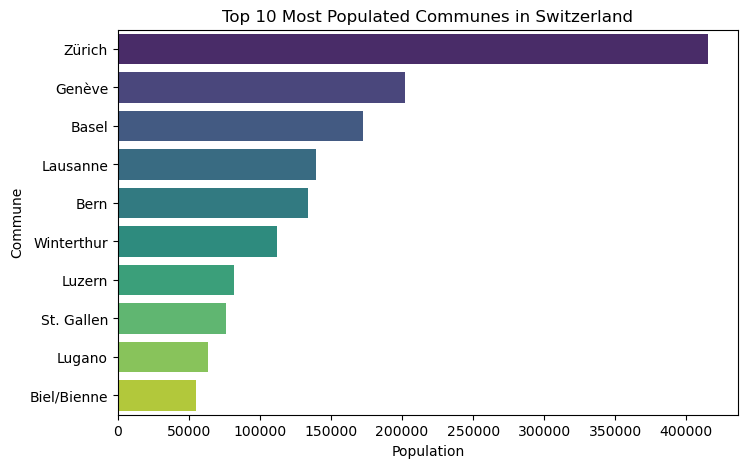

In [31]:
# Top 10 most populated communes (from previous step)
top10 = top_10_most_pop.copy()

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
sns.barplot(x="Residents", y="Commune", data=top10, palette="viridis")

plt.title("Top 10 Most Populated Communes in Switzerland")
plt.xlabel("Population")
plt.ylabel("Commune")
plt.show()

`top10 = top_10_most_pop.copy()` creates a copy of the previously computed DataFrame containing the top 10 communes by population. Using `.copy()` ensures that any changes to `top10` do not affect the original DataFrame.


`plt.figure(figsize=(8,5))`sets up a new figure with a width of 8 inches and height of 5 inches. This controls the overall size of the chart.

`sns.barplot(x="Residents", y="Commune", data=top10")`  creates a horizontal bar plot where the y-axis shows the commune names and the x-axis shows the population as instructed.  

`palette="viridis"` applies a visually appealing color gradient to the bars.


`plt.title("Top 10 Most Populated Communes in Switzerland")` adds a clear title to the chart.

`plt.xlabel("Population")` and `plt.ylabel("Commune")`labels the axes for clarity.

`plt.show()` renders the plot in the notebook.

> **Observations:** The chart highlights population concentration in major coummunes across Switzerland.. It clearly shows that Zürich significantly dominates all other large urban communes like Geneva, Basel, and Lausanne in terms of population.

## 2. Horizontal Stacked Bar Plot: Division of Land Area of Top 10 Communes

Next, we visualize how land is divided in these top 10 communes among four area types: 
* `Settlement`
* `Agricultural`
* `Wooded`
* `Unproductive`

The percentages for each commune sum to 100.

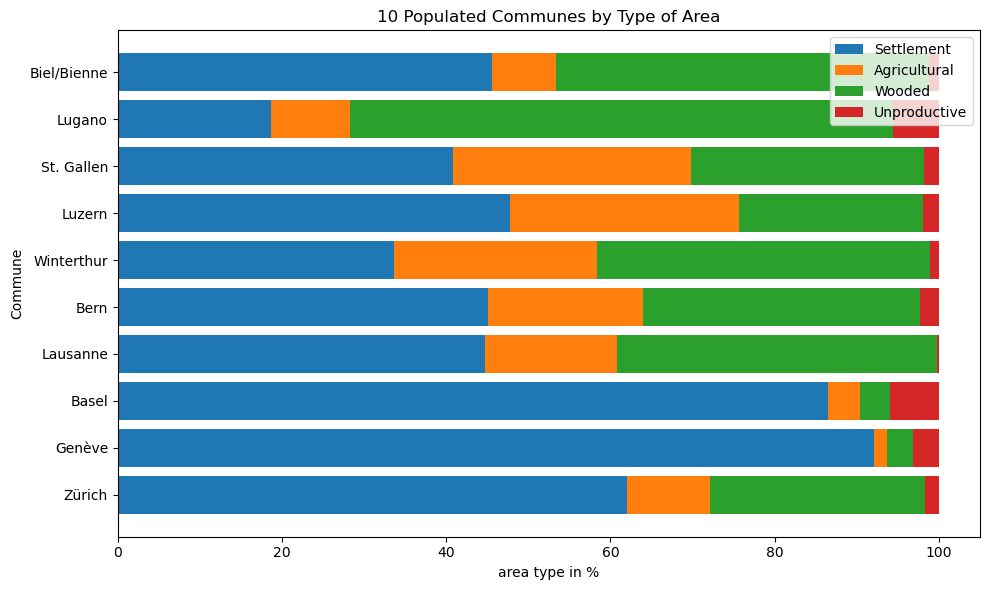

In [44]:
# Get top 10 communes by name
communes = top_10_most_pop["Commune"].tolist()

# Select the 4 land areas for these communes
top10_area = df.loc[top_10_most_pop.index, ["Settlement area", "Agricultural area", "Wooded area", "Unproductive area"]]

# Store each land type as a separate variable for clarity
settlement = top10_area["Settlement area"]
agricultural = top10_area["Agricultural area"]
wooded = top10_area["Wooded area"]
unproductive = top10_area["Unproductive area"]

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10,6))

# Stacking
ax.barh(communes, settlement, label="Settlement")
ax.barh(communes, agricultural, left=settlement, label="Agricultural")
ax.barh(communes, wooded, left=settlement+agricultural, label="Wooded")
ax.barh(communes, unproductive, left=settlement+agricultural+wooded, label="Unproductive")

ax.set_xlabel("area type in %")
ax.set_ylabel("Commune")
ax.set_title("10 Populated Communes by Type of Area")
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Identify the communes to plot:
I filled the y-axis with `communes = top_10_most_pop["Commune"].tolist()`. 


Using the `df` DataFrame, I selected the four columns corresponding to the land types for these communes with `top10_area = df.loc[..., [...]].
top_10_most_pop.index`


The stacking ensures that each bar represents the total land area, with the segments showing the composition of land types.


**Analysis of Land Distribution in Top 10 Most Populated Communes**

From the horizontal stacked bar chart, the following observations can be made regarding the land distribution among the four categories:

* Genève, Basel – These highly urbanized communes are dominated by Settlement area, reflecting dense residential and commercial development. Agricultural and Wooded areas are minimal, while Unproductive land is almost negligible.

* Bern, Lausanne – These semi-urban communes retain a noticeable proportion of Agricultural area, indicating that farmland still coexists with urban zones. Wooded areas are moderate, and Settlement areas are smaller than in central urban communes.

* Winterthur, Fribourg – Communes in peripheral or semi-rural regions show higher proportions of Wooded area, highlighting natural or forested land. Agricultural land is also present but less dominant compared to Bern or Lausanne.

* All communes – Unproductive land (lakes, mountains, or unusable terrain) is generally small but visible in certain communes with natural obstacles.

* Total land area differences – The overall length of each bar indicates that some communes (e.g., Bern, Lausanne) cover larger total areas than more densely populated urban communes like Basel or Geneva, even though the latter have higher populations.

Summary:
The horizontal stacked bar chart clearly shows both the total land area and the composition of land types for the top 10 most populated communes. Urban areas are dominated by Settlement land, semi-urban communes balance Agricultural and Settlement areas, and peripheral/rural communes retain more Wooded areas. Unproductive areas are minimal but highlight natural geographic constraints. This visualization helps understand the interplay between population density, urbanization, and land composition.